# Trabalho Final

In [7]:
# Importação das libs necessárias
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


## Carga e tratamento dos dados

In [8]:
df_lithology = pd.read_csv('datasets/lithology.csv', sep=';')


In [9]:
df_lithology

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,-999.0,1.611410,1.798681,1.884186,80.200851,...,24.735691,0.314847,0.150172,-0.000000,-0.000000,-0.000000,0.000,0.000000,6,68
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,-999.0,1.618070,1.795641,1.889794,79.262886,...,24.492376,0.318528,0.148269,0.527710,-0.005608,0.937965,0.152,-0.243315,6,68
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,-999.0,1.626459,1.800733,1.896523,74.821999,...,24.202299,0.322946,0.139258,0.429855,-0.006729,4.440887,0.152,-0.290077,6,68
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,-999.0,1.621594,1.801517,1.891913,72.878922,...,24.400797,0.319919,0.135315,0.024185,0.004610,1.943077,0.152,0.198498,6,68
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,-999.0,1.602679,1.795299,1.880034,71.729141,...,24.916765,0.312121,0.132982,0.021088,0.011879,1.149780,0.152,0.515968,6,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,3169.3124,444920.37500,6421578.0,-999.000000,8.423170,-999.0,-999.000000,-999.000000,2.527984,77.654900,...,3.853715,0.906928,0.188539,5.709644,-0.050081,-15.087708,0.152,-1.235199,11,7
1170507,3169.4644,444920.37500,6421578.0,-999.000000,8.379244,-999.0,-999.000000,-999.000000,2.537613,75.363937,...,3.621808,0.924426,0.181304,1.034114,-0.009629,2.290962,0.152,-0.231906,11,7
1170508,3169.6164,444920.37500,6421578.0,-999.000000,8.350248,-999.0,-999.000000,-999.000000,2.491860,66.452843,...,4.739676,0.841284,0.153161,-5.094579,0.045753,8.911095,0.152,1.117868,11,7
1170509,3169.7684,444920.37500,6421578.0,-999.000000,8.313779,-999.0,-999.000000,-999.000000,2.447539,55.784817,...,5.862411,0.760743,0.119469,-5.401767,0.044321,10.668026,0.152,1.122734,11,7


In [10]:
# Lista de colunas
df_lithology.columns

category_columns = ['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded']

In [11]:
# Conferindo as opções
df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000.0    720803
30000.0    168937
65030.0    150455
70000.0     56320
80000.0     33329
99000.0     15245
70032.0     10513
88000.0      8213
90000.0      3820
74000.0      1688
86000.0      1085
93000.0       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [30]:
# Lendo o hidden e checando as colunas
df_hidden = pd.read_csv('datasets/hidden.csv', sep=';')
df_hidden


,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,1518.2800,433906.7500,6460000.5,-1493.241821,15.506232,-999.0,-999.000000,0.878615,-999.0,103.451515,...,-999.0,-999.0,0.229715,-0.000000,-999.0,-0.000000,0.000,-999.0,5,51
1,1518.4320,433906.7500,6460000.5,-1493.393799,18.524611,-999.0,-999.000000,0.874237,-999.0,94.124893,...,-999.0,-999.0,0.206369,1.616959,-999.0,9.326622,0.152,-999.0,5,51
2,1518.5840,433906.7500,6460000.5,-1493.545776,18.855669,-999.0,-999.000000,0.869858,-999.0,93.586487,...,-999.0,-999.0,0.205021,0.131363,-999.0,0.538406,0.152,-999.0,5,51
3,1518.7360,433906.7500,6460000.5,-1493.697754,19.163353,-999.0,-999.000000,0.865479,-999.0,91.113373,...,-999.0,-999.0,0.198831,1.637512,-999.0,2.473114,0.152,-999.0,5,51
4,1518.8880,433906.7500,6460000.5,-1493.849609,18.489744,-999.0,0.849849,0.863804,-999.0,100.228333,...,-999.0,-999.0,0.221647,0.819153,-999.0,-9.114960,0.152,-999.0,5,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122392,2973.2988,536096.0625,6793022.0,-2943.444580,8.276272,-999.0,2.820439,3.158570,-999.0,90.720284,...,-999.0,-999.0,0.455601,0.591225,-999.0,1.536675,0.152,-999.0,0,16
122393,2973.4508,536096.0625,6793022.0,-2943.595947,8.267273,-999.0,3.020778,3.332977,-999.0,87.062027,...,-999.0,-999.0,0.436064,0.392357,-999.0,3.658257,0.152,-999.0,0,16
122394,2973.6028,536096.0625,6793022.0,-2943.747559,8.250099,-999.0,2.795711,3.044179,-999.0,86.115921,...,-999.0,-999.0,0.431012,0.020180,-999.0,0.946106,0.152,-999.0,0,16
122395,2973.7548,536096.0625,6793022.0,-2943.899170,-999.000000,-999.0,2.658694,2.847681,-999.0,89.497131,...,-999.0,-999.0,0.449069,-0.115906,-999.0,-3.381210,0.152,-999.0,0,16


In [13]:
# Monta classes para a rede com o índice

lithofacies = {
    30000: 'Sandstone',
    65030: 'Sandstone/Shale',
    65000: 'Shale',
    80000: 'Marl',
    74000: 'Dolomite',
    70000: 'Limestone',
    70032: 'Chalk',
    88000: 'Halite',
    86000: 'Anhydrite',
    99000: 'Tuff',
    90000: 'Coal',
    93000: 'Basement'
}
lithofacies

lithofacies_keys = list(lithofacies.keys())

df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY_IDX'] = df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY'].apply(lambda x: lithofacies_keys.index(x))


In [15]:
# Usando exemplos de https://towardsdatascience.com/deep-learning-on-dataframes-with-pytorch-66b21be54ef6
#                    https://medium.com/swlh/my-first-work-with-pytorch-eea3bc82068
#                    https://visualstudiomagazine.com/articles/2020/12/15/pytorch-network.aspx

X = df_lithology[category_columns].values
y = df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY_IDX'].values

# Random state fixo para reproduzir o mesmo cenário
random_state = 42

# Quebra o dataset em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Random state ensures that the splits that you generate are reproducible. 
# Scikit-learn uses random permutations to generate the splits. 
# The random state that you provide is used as a seed to the random number generator.
# This ensures that the random numbers are generated in the same order.
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [16]:
# Criando nossa rede neural

class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(category_columns), out_features=20)
        self.fc2 = nn.Linear(in_features=20, out_features=16)
        self.output = nn.Linear(in_features=16, out_features=len(lithofacies))
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        #m = nn.Dropout(p=0.2)
        #x = m(x)
        
        return x


In [17]:
%%time

# Treinando

model = ANN()
#model

# ?
criterion = nn.CrossEntropyLoss()

# Otimizador Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Otimizador SGD
#learning_rate = 0.05
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 100
loss_arr = []

for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    loss_arr.append(float(loss))
    
 
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# modo 
model.eval()


Epoch: 0 Loss: 34314.8359375
Epoch: 10 Loss: 32162.37109375
Epoch: 20 Loss: 6470.19873046875
Epoch: 30 Loss: 7244.33642578125
Epoch: 40 Loss: 3095.56689453125
Epoch: 50 Loss: 4260.27099609375
Epoch: 60 Loss: 2.3592307567596436
Epoch: 70 Loss: 2.2990472316741943
Epoch: 80 Loss: 2.2255375385284424
Epoch: 90 Loss: 2.1496734619140625
Wall time: 1min 25s


ANN(
  (fc1): Linear(in_features=30, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=12, bias=True)
)

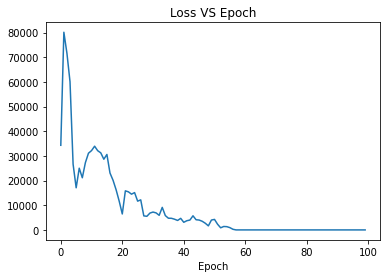

In [18]:
plt.title('Loss VS Epoch')
plt.xlabel("Loss")
plt.xlabel("Epoch")
plt.plot(range(epochs), loss_arr)

In [19]:
# Print accuracy
predictions = model(X_train)
print("train accuracy: {} %".format(100 - np.mean(np.abs(torch.argmax(predictions, dim=1).detach().numpy() - y_train.detach().numpy())) * 100))

predictions = model(X_test)
print("test accuracy: {} %".format(100 - np.mean(np.abs(torch.argmax(predictions, dim=1).detach().numpy() - y_test.detach().numpy())) * 100))


train accuracy: 21.321795627546976 %
test accuracy: 20.943345450506826 %


In [20]:
# 20% de acurácia no treino é péssimo. 

# Vamos tentar plotar algo
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [54]:
# Prevendo o hidden
predictions = model(torch.FloatTensor(df_hidden.values))

# Output
import csv
with open('datasets/hidden-results.csv', 'w', newline='\n') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=';')
    spamwriter.writerow(['lithology'])
    spamwriter.writerows([[lithofacies_keys[x]] for x in torch.argmax(predictions, dim=1)])
